In [1]:
import numpy

In [2]:
def Sigmoid(x):
    return 1.0 / (1.0 + numpy.exp(-x))

In [3]:
X = numpy.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
D = numpy.array([0, 0, 1, 1])

In [4]:
def DeltaSGD(W, X, D):
    alpha = 0.9
    N = 4
    for k in range(N):
        x = X[k]
        d = D[k]
        v = numpy.dot(W, x)
        y = Sigmoid(v)
        
        e = d - y
        delta = y*(1-y)*e
        
        dW = alpha*delta*x
        
        W[0][0] = W[0][0] + dW[0]
        W[0][1] = W[0][1] + dW[1]
        W[0][2] = W[0][2] + dW[2]
        
    return W

In [5]:
W = 2*numpy.random.rand(1,3) - 1
for x in range(10000):
    W = DeltaSGD(W, X, D)

In [6]:
y = numpy.zeros((4))

In [7]:
for k in range(4):
    x = X[k]
    v = numpy.dot(W, x)
    y[k] = Sigmoid(v)

In [8]:
y

array([0.01020437, 0.00829452, 0.99324234, 0.99168338])

In [9]:
def DeltaBatch(W, X, D):
    alpha = 0.9
    dWsum = numpy.zeros((3))
    N = 4
    for k in range(N):
        x = X[k]
        d = D[k]
        v = numpy.dot(W, x)
        y = Sigmoid(v)
        
        e = d - y
        delta = y*(1-y)*e
        
        dW = alpha*delta*x
        
        dWsum = dWsum + dW
    
    dWavg = dWsum / N
    
    W[0][0] = W[0][0] + dWavg[0]
    W[0][1] = W[0][1] + dWavg[1]
    W[0][2] = W[0][2] + dWavg[2]
        
    return W

In [10]:
W = 2*numpy.random.rand(1,3) - 1
for epoch in range(10000):
    W = DeltaBatch(W, X, D)

In [11]:
y = numpy.zeros((4))

In [12]:
for k in range(4):
    x = X[k]
    v = numpy.dot(W, x)
    y[k] = Sigmoid(v)

In [13]:
y

array([0.02084648, 0.01686505, 0.98628575, 0.98303531])

In [14]:
X = numpy.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
D = numpy.array([0, 0, 1, 1])

In [15]:
E1 = numpy.zeros((1000))
E2 = numpy.zeros((1000))

In [16]:
W1 = 2*numpy.random.rand(1, 3)-1
#W2 = W1
W2 = 2*numpy.random.rand(1, 3)-1

In [17]:
for epoch in range(1000):
    W1 = DeltaSGD(W1, X, D)
    W2 = DeltaBatch(W2, X, D)
    
    es1 = 0.0
    es2 = 0.0
    N = 4
    
    for k in range(4):
        x = X[k]
        d = D[k]
        
        v1 = numpy.dot(W1, x)
        y1 = Sigmoid(v1)
        es1 = es1 + numpy.power((d-y1), 2)
        
        v2 = numpy.dot(W2, x)
        y2 = Sigmoid(v2)
        es2 = es2 + numpy.power((d-y2), 2)
        
    E1[epoch] = es1 / N
    E2[epoch] = es2 / N

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

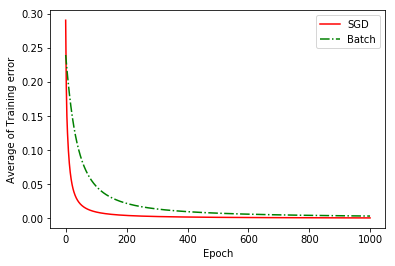

In [19]:
plt.plot(range(1000), E1, 'r-', label='SGD')
plt.plot(range(1000), E2, 'g-.', label='Batch')
plt.xlabel("Epoch")
plt.ylabel("Average of Training error")
plt.legend()
plt.show()

In [20]:
E1[999]

0.000775057282731966

In [21]:
E2[999]

0.0035157593686457674

In [23]:
X = numpy.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
D = numpy.array([0, 1, 1, 0])

In [24]:
W = 2*numpy.random.rand(1,3) - 1
for x in range(40000):
    W = DeltaSGD(W, X, D)

In [25]:
y = numpy.zeros((4))

In [26]:
for k in range(4):
    x = X[k]
    v = numpy.dot(W, x)
    y[k] = Sigmoid(v)

In [27]:
y

array([0.52965337, 0.5       , 0.47034663, 0.44090112])